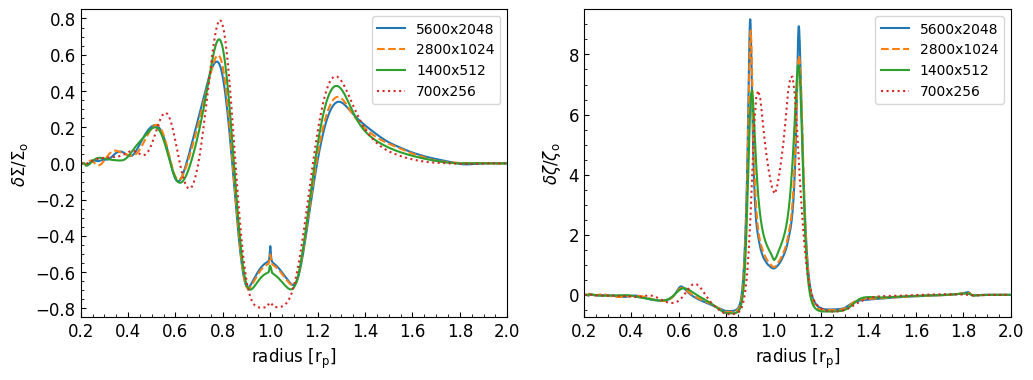

In [10]:
#Side by side zone comparison for PV and Surface density

import readfargo3d as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
path4 = './bae2017_01jup700x256/'
path3 = './bae2017_01jup1400x512/'
path2 = './bae2017_01jup2800x1024/'
path  = './bae2017_01jup5600x2048/'
itime = 100
r0    = 1.0
fargo           = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path)
fargo_init      = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path)
fargo_half      = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)
fargo_halfinit  = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path2)
fargo_quart     = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path3)
fargo_quartinit = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path3)
fargo_eight     = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path4)
fargo_eightinit = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path4)

nf = itime
phi = np.loadtxt(path +'domain_x.dat')
rad  = np.loadtxt(path +'domain_y.dat')
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[3:-4] + rad[4:-3])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init   = pl.fromfile(path +'gasdens0.dat').reshape(ny,nx)
rho   = pl.fromfile(path+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init   = pl.fromfile(path + 'gasvx0.dat').reshape(ny,nx)
vphi   = pl.fromfile(path+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad     = pl.fromfile(path+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init = pl.fromfile(path+'gasvy0.dat').reshape(ny,nx)
omegap = np.loadtxt(path+'planet0.dat')[itime][-1]
vphi += omegap*rad2d
omegapinit = np.loadtxt(path+'planet0.dat')[0][-1]
vphi_init += omegapinit*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv_2d = ((rad2d*vphi)[1:,:]-(rad2d*vphi)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv_2d = pv_2d[:,:-1]
pv_2d -= ((vrad[:,1:]-vrad[:,:-1])/dphi)[1:,:]
pv_2d /= rad2d[:-1,:-1]
pv_2d /= rho[:-1,:-1]
pv_original = pv_2d

pv_2di = ((rad2d*vphi_init)[1:,:]-(rad2d*vphi_init)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_2di = pv_2di[:,:-1]
pv_2di -= ((vrad_init[:,1:]-vrad_init[:,:-1])/dphi)[1:,:]
pv_2di /= rad2d[:-1,:-1]
pv_2di /= rho_init[:-1,:-1]
pv_original_init = pv_2di

#PV calculations for all other zones (3) --------
nf = itime
phi = np.loadtxt(path2 +'domain_x.dat')
rad  = np.loadtxt(path2 +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init2   = pl.fromfile(path2 +'gasdens0.dat').reshape(ny,nx)
rho2   = pl.fromfile(path2+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init2   = pl.fromfile(path2 + 'gasvx0.dat').reshape(ny,nx)
vphi2   = pl.fromfile(path2+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad2     = pl.fromfile(path2+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init2 = pl.fromfile(path2+'gasvy0.dat').reshape(ny,nx)
omegap2 = np.loadtxt(path2+'planet0.dat')[itime][-1]
vphi2 += omegap2*rad2d
omegapinit2 = np.loadtxt(path2+'planet0.dat')[0][-1]
vphi_init2 += omegapinit2*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv2 = ((rad2d*vphi2)[1:,:]-(rad2d*vphi2)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv2 = pv2[:,:-1]
pv2 -= ((vrad2[:,1:]-vrad2[:,:-1])/dphi)[1:,:]
pv2 /= rad2d[:-1,:-1]
pv2 /= rho2[:-1,:-1]
pv_half = pv2

pv_init2 = ((rad2d*vphi_init2)[1:,:]-(rad2d*vphi_init2)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init2 = pv_init2[:,:-1]
pv_init2 -= ((vrad_init2[:,1:]-vrad_init2[:,:-1])/dphi)[1:,:]
pv_init2 /= rad2d[:-1,:-1]
pv_init2 /= rho_init2[:-1,:-1]
pv_half_init = pv_init2

#----------------
phi = np.loadtxt(path3 +'domain_x.dat')
rad  = np.loadtxt(path3 +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init3   = pl.fromfile(path3 +'gasdens0.dat').reshape(ny,nx)
rho3   = pl.fromfile(path3+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init3   = pl.fromfile(path3 + 'gasvx0.dat').reshape(ny,nx)
vphi3   = pl.fromfile(path3+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad3     = pl.fromfile(path3+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init3 = pl.fromfile(path3+'gasvy0.dat').reshape(ny,nx)
omegap3 = np.loadtxt(path3+'planet0.dat')[itime][-1]
vphi3 += omegap3*rad2d
omegapinit3 = np.loadtxt(path3+'planet0.dat')[0][-1]
vphi_init3 += omegapinit3*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv3 = ((rad2d*vphi3)[1:,:]-(rad2d*vphi3)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv3 = pv3[:,:-1]
pv3 -= ((vrad3[:,1:]-vrad3[:,:-1])/dphi)[1:,:]
pv3 /= rad2d[:-1,:-1]
pv3 /= rho3[:-1,:-1]
pv_quarter = pv3

pv_init3 = ((rad2d*vphi_init3)[1:,:]-(rad2d*vphi_init3)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init3 = pv_init3[:,:-1]
pv_init3 -= ((vrad_init3[:,1:]-vrad_init3[:,:-1])/dphi)[1:,:]
pv_init3 /= rad2d[:-1,:-1]
pv_init3 /= rho_init3[:-1,:-1]
pv_quarter_init = pv_init3
#---------------
phi = np.loadtxt(path4 +'domain_x.dat')
rad  = np.loadtxt(path4 +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init4   = pl.fromfile(path4 +'gasdens0.dat').reshape(ny,nx)
rho4   = pl.fromfile(path4+'gasdens' + str(nf) + '.dat').reshape(ny,nx)
vphi_init4   = pl.fromfile(path4 + 'gasvx0.dat').reshape(ny,nx)
vphi4   = pl.fromfile(path4+'gasvx' + str(nf) + '.dat').reshape(ny,nx)
vrad4     = pl.fromfile(path4+'gasvy' + str(nf) + '.dat').reshape(ny,nx)
vrad_init4 = pl.fromfile(path4+'gasvy0.dat').reshape(ny,nx)
omegap4 = np.loadtxt(path4+'planet0.dat')[itime][-1]
vphi4 += omegap4*rad2d
omegapinit4 = np.loadtxt(path4+'planet0.dat')[0][-1]
vphi_init4 += omegapinit4*rad2d

dphi = np.abs(fargo.phi[0]-fargo.phi[1])

pv4 = ((rad2d*vphi4)[1:,:]-(rad2d*vphi4)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv4 = pv4[:,:-1]
pv4 -= ((vrad4[:,1:]-vrad4[:,:-1])/dphi)[1:,:]
pv4 /= rad2d[:-1,:-1]
pv4 /= rho4[:-1,:-1]
pv_eighth = pv4

pv_init4 = ((rad2d*vphi_init4)[1:,:]-(rad2d*vphi_init4)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_init4 = pv_init4[:,:-1]
pv_init4 -= ((vrad_init4[:,1:]-vrad_init4[:,:-1])/dphi)[1:,:]
pv_init4 /= rad2d[:-1,:-1]
pv_init4 /= rho_init4[:-1,:-1]
pv_eighth_init = pv_init4

pv2dorig = pv_original.mean(axis=1)
pv_init2dorig = pv_original_init.mean(axis=1)
pv2dhalf = pv_half.mean(axis=1)
pv_init2dhalf = pv_half_init.mean(axis=1)
pv2dquart = pv_quarter.mean(axis=1)
pv_init2dquart = pv_quarter_init.mean(axis=1)
pv2deight = pv_eighth.mean(axis=1)
pv_init2deight = pv_eighth_init.mean(axis=1)
#-----------------------------------------------------


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 4))
figsize=(12,6)
fig.tight_layout

ax1.plot(fargo.r,((fargo.rho-fargo_init.rho)/fargo_init.rho).mean(axis=0), label='5600x2048')
ax1.plot(fargo_half.r,((fargo_half.rho-fargo_halfinit.rho)/fargo_halfinit.rho).mean(axis=0), label='2800x1024',linestyle='dashed')
ax1.plot(fargo_quart.r,((fargo_quart.rho-fargo_quartinit.rho)/fargo_quartinit.rho).mean(axis=0), label='1400x512')
ax1.plot(fargo_eight.r,((fargo_eight.rho-fargo_eightinit.rho)/fargo_eightinit.rho).mean(axis=0), label='700x256',linestyle='dotted')
ax1.legend()
ax1.set_xlim(0.2,2)
ax1.set_ylim(-0.85,0.85)
#ax1.ylim(-2,4)
ax1.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4,1.6,1.8,2.0])  # Adjust these values as needed
ax1.set_xticklabels(['0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4','1.6','1.8','2.0'],fontsize=12)  # Labels corresponding to the tick positions
ax1.set_xlabel(r'radius [r$\rm_p$]',fontsize=12)
ax1.set_ylabel(r'$\delta$$\Sigma$/$\Sigma$$_{\rm o}$',fontsize=12)
ax1.tick_params(axis='both', which='both', direction='in', labelsize='12')
ax1.minorticks_on()

ax2.plot(fargo.r[1:],(pv2dorig-pv_init2dorig)/pv_init2dorig, label = '5600x2048')
ax2.plot(fargo_half.r[1:],(pv2dhalf-pv_init2dhalf)/pv_init2dhalf, label = '2800x1024',linestyle='dashed')
ax2.plot(fargo_quart.r[1:],(pv2dquart-pv_init2dquart)/pv_init2dquart, label = '1400x512')
ax2.plot(fargo_eight.r[1:],(pv2deight-pv_init2deight)/pv_init2deight, label = '700x256',linestyle='dotted')
ax2.set_xlabel(r'radius [r$\rm_p$]',fontsize=12)
ax2.set_ylabel(r'$\delta$$\zeta$/$\zeta$$_{\rm o}$',fontsize=12)
ax2.set_xlim(0.2, 2)
ax2.set_ylim(-0.75,9.5)
ax2.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4,1.6,1.8,2.0])  # Adjust these values as needed
ax2.set_xticklabels(['0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4','1.6','1.8','2.0'],fontsize=12)  # Labels corresponding to the tick positions
ax2.tick_params(axis='both', which='both', direction='in',labelsize='12')
ax2.minorticks_on()
#ax2.text(0.45,4,'orbit 1000',fontsize=14,color='black',alpha=0.8)
#ax2.set_title(r't$_{\rm p}$ = '+str(itime*10))
ax2.legend(loc='upper right')
#plt.savefig('PV1mjup_2D'+str(itime*10)+'_allzones',dpi=300,bbox_inches='tight')

#ax2.set_title('orbit '+str(itime*10))
#plt.savefig('density_plot_allzones01mjup'+str(itime*10)+'.png',dpi=300,bbox_inches='tight')
plt.subplots_adjust(hspace=0.14, wspace=0.18)
plt.savefig('PaperImages/Combined_Fig_1Mjup_allzones_1000orbits.png',dpi=300,bbox_inches='tight')

In [4]:
import readfargo3d as fg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

dir1 = './bae2017_01jup1400x512/' #2D
dir2 = './p3disof_01jup/' #3D
for itime1 in np.arange(0,101):
    itime1 = itime1

    r0 = 1.0
    fargo1    = fg.frame(itime1,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
    fargo2    = fg.frame(itime1,rho=True,vphi=True,vr=True,vtheta=True,dir=dir2) 
    fargo1i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
    fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=dir2) 

    #3D Density Image
    phi3d = fargo2.phi
    rad3d = fargo2.r

    rad3d, phi3d = np.meshgrid(rad3d, phi3d)                                                                                                                       

    X3d = rad3d*np.cos(phi3d)
    Y3d = rad3d*np.sin(phi3d)

    #integration
    rho3d = fargo2.rho.sum(axis=2)*fargo2.r
    rho3di = fargo2i.rho.sum(axis=2)*fargo2i.r

    #slice
    #rho3d = fargo2.rho[:,:,-1]
    #rho3di = fargo2i.rho[:,:,-1]

    vmin = -1.2
    vmax = 1.5
    levels = np.linspace(vmin,vmax,256)

    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[2, 1], hspace=0.3, wspace=0.3)

    # First Image Plot (Upper Left)
    ax1 = plt.subplot(gs[0, 0])

    # Second Image Plot (Upper Right)
    ax2 = plt.subplot(gs[0, 1])

    # ... (rest of the code for image plots)

    # Line Plot (Centered in the Second Row)
    ax3 = plt.subplot(gs[1, :]) 

    #2D
    phi2d = fargo1.phi
    rad2d  = fargo1.r

    rad2d, phi2d = np.meshgrid(rad2d, phi2d) #explain meshgrid?                                                                                                                         

    X2d = rad2d*np.cos(phi2d)
    Y2d = rad2d*np.sin(phi2d)

    rho_2di   = fargo1i.rho
    rho_2d   = fargo1.rho

    ax1.contourf(X2d, Y2d,((rho_2d-rho_2di)/rho_2di), levels=levels)
    ax1.set_title(r'2D, $\delta$$\Sigma$/$\Sigma$$_{\rm o}$, time = '+ str(itime1*10)+ ' orbits', fontsize=14)
    ax1.set_xlabel('X [au]', fontsize=12)
    ax1.set_ylabel('Y [au]', fontsize=12)
    ax1.set_xlim(-2.0,2.0)
    ax1.set_ylim(-2.0,2.0)
    #3D

    cp = ax2.contourf(X3d, Y3d,((rho3d - rho3di)/rho3di), levels=levels)
    cax2 = fig.add_axes([0.2, 0.9, 0.6, 0.05])
    cd = fig.colorbar(cp, cax=cax2,orientation='horizontal',fraction=0.046, pad=0.04)
    cax2.xaxis.set_major_locator(ticker.MaxNLocator(symmetric=True))
    #cd.set_label(r'$\delta$$\Sigma$/$\Sigma$$_{\rm o}$', labelpad=-37, y=0.2, x = -.05, fontsize = 12)


    ax2.set_xlabel('X [au]', fontsize=12)
    ax2.set_ylabel('Y [au]', fontsize=12)
    ax2.set_title(r'3D, $\delta$$\Sigma$/$\Sigma$$_{\rm o}$, time = '+ str(itime1*10)+ ' orbits', fontsize=14)
    ax2.set_xlim(-2.0,2.0)
    ax2.set_ylim(-2.0,2.0)


    #----------2D azimuth avg-----------

    ax3.plot(fargo2.r,((rho_2d-rho_2di)/rho_2di).mean(axis=0), label = '2D')
    ax3.plot(fargo2.r,((rho3d-rho3di)/rho3di).mean(axis=0), label = '3D')
    ax3.legend()
    ax3.set_xlabel('r [au]', fontsize=12)
    ax3.set_ylabel(r'$\delta$$\Sigma$/$\Sigma$$_{\rm o}$', fontsize=12)
    ax3.set_title(r'$\delta$$\Sigma$/$\Sigma$$_{\rm o}$, azimuthally averaged', fontsize=14)
    ax3.set_xlim(0.2,2.0)
    #ax3.set_ylim(-2.0,2.0)
    fig.subplots_adjust(top=0.82)

    plt.savefig('./2D3Dsdens_movie/01MjupOrbit'+str(itime1*10)+'.png',dpi=300,bbox_inches='tight')
    plt.close()
print('done')

done


In [5]:
pwd

'/blue/jbae/grobbins1/fargo3d/outputs'